**Table of Contents**
1. Introduction
2. EDA
    - 2.1 Duplicates
    - 2.2 Feature Types
    - 2.3 Missing Values
    - 2.4 Visualize
        - 2.4.1 Target
        - 2.4.2 Numerical Features
            - 2.4.2.1 Outliers
            - 2.4.2.2 Correlation
        - 2.4.3 Categorical Features
3. Data Preparation
    - 3.1 Make Target Binary
    - 3.2 Drop Duplicates
    - 3.3 Split
    - 3.4 Create Custom Transformations
    - 3.5 Preprocessing Pipeline
    - 3.6 Visualize Final Data
4. Training
    - 4.1 Baseline Comparison
    - 4.2 Hyperparameter Tuning
5. Evaluate Best Models
6. Feature Importance

# Introduction

Data from UCI Machine Learning Repository
https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

"This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms
per species). Each mushroom is identified as definitely edible, definitely poisonous, or of
unknown edibility and not recommended (the latter class was combined with the poisonous class)."

"One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).

Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w"

In this technical challenge we will build a classifier algorithm with the aim of detecting if a mushroom is poisonous.

In [402]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import colormaps as mplcmaps
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

In [162]:
data = pd.read_csv("../MushroomDataset/secondary_data.csv", sep=";")

In [163]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

# EDA

## Duplicates

In [165]:
data.duplicated().sum()

146

In [166]:
data.drop_duplicates(inplace=True)

Remove duplicates as first thing to avoid the performance of the model being potentially overoptimistic if a duplicate pair was later split into training and testing.

## Feature types

In [8]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object'])

if sorted(numerical_data.columns.to_list() + categorical_data.columns.to_list()) != sorted(data.columns.to_list()):
    raise ValueError("Incomplete split into numerical and categorical features")

In [9]:
numerical_data.head()

,cap-diameter,stem-height,stem-width
0,15.26,16.95,17.09
1,16.60,17.99,18.19
2,14.07,17.80,17.74
3,14.17,15.77,15.98
4,14.64,16.53,17.20


In [10]:
categorical_data.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,x,g,o,f,e,NaN,w,s,y,w,u,w,t,g,NaN,d,w
1,p,x,g,o,f,e,NaN,w,s,y,w,u,w,t,g,NaN,d,u
2,p,x,g,o,f,e,NaN,w,s,y,w,u,w,t,g,NaN,d,w
3,p,f,h,e,f,e,NaN,w,s,y,w,u,w,t,p,NaN,d,w
4,p,x,h,o,f,e,NaN,w,s,y,w,u,w,t,p,NaN,d,w


## Missing values

In [39]:
data.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
dtype: int64

In description it says gill-attachment and ring-type have "?" as unknown values, but they actually seem to be set to NaN

In [45]:
(data == "?").any()

class                   False
cap-diameter            False
cap-shape               False
cap-surface             False
cap-color               False
does-bruise-or-bleed    False
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-root               False
stem-surface            False
stem-color              False
veil-type               False
veil-color              False
has-ring                False
ring-type               False
spore-print-color       False
habitat                 False
season                  False
dtype: bool

In [46]:
data["gill-attachment"].unique(), data["ring-type"].unique()

(array(['e', nan, 'a', 'd', 's', 'x', 'p', 'f'], dtype=object),
 array(['g', 'p', 'e', 'l', 'f', 'm', nan, 'r', 'z'], dtype=object))

In [63]:
# Percentage of missing values

missing_percentages = (100*data.isna().sum() / len(data)).astype(int)

print(missing_percentages)

class                    0
cap-diameter             0
cap-shape                0
cap-surface             23
cap-color                0
does-bruise-or-bleed     0
gill-attachment         16
gill-spacing            41
gill-color               0
stem-height              0
stem-width               0
stem-root               84
stem-surface            62
stem-color               0
veil-type               94
veil-color              87
has-ring                 0
ring-type                4
spore-print-color       89
habitat                  0
season                   0
dtype: int64


To know how to deal with variables with many missing values, I have to consider the types of missing value:
* Systematic missing values, which indicates non-applicability (e.g. veil-type or veil-color for a mushroom with no veil). 
* Random missing values, which occurs for unknown reasons like incomplete observations.

I will remove variables with > 20% missing values if they are random

In [116]:
data_with_filled_nans = data.copy()

for col in missing_percentages[missing_percentages > 0].keys():
    data_with_filled_nans[col].fillna("na", inplace=True)

In [117]:
def print_na_percentage(data, col_list):
    for col in col_list:
        perc = 100 * data[col].isna().sum() / len(data)

        print("%.1f percentage of %s data is NaN"%(perc, col))
        
    if len(col_list) > 1:
        joint_cond = data[col_list[0]].isna()
        
        for col in col_list[1:]:
            joint_cond &= data[col].isna()
        
        joint_perc = 100 * joint_cond.sum() / len(data)
        
        print("%.1f percentage of joint %s data is NaN"%(joint_perc, " and ".join(col_list)))

###### Gill

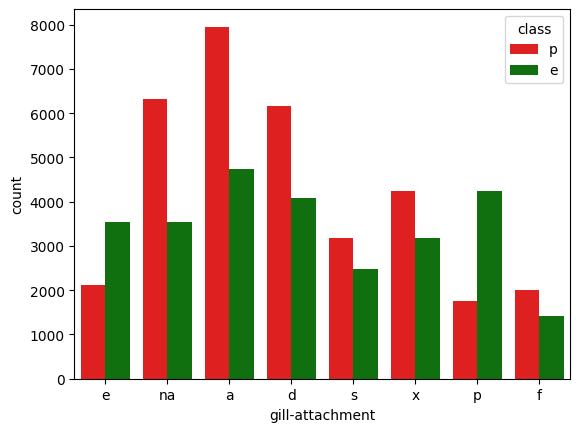

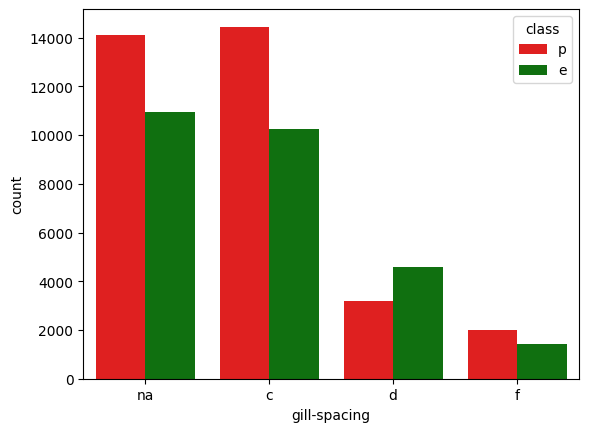

In [118]:
for col in missing_percentages[missing_percentages > 0].keys():
    if "gill" not in col:
        continue
    
    sns.countplot(x=data_with_filled_nans[col], hue=data['class'], palette=["red","green"])
    plt.show()

* gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
* gill-spacing (n): close=c, distant=d, none=f

In [119]:
print_na_percentage(data, ["gill-attachment","gill-spacing"])

16.2 percentage of gill-attachment data is NaN
41.1 percentage of gill-spacing data is NaN
8.1 percentage of joint gill-attachment and gill-spacing data is NaN


If a mushroom has no gill, then "gill-attachment", "gill-spacing" and "gill-color" would be non-applicable. 

But the 3 already have a none=f category, of which there are some values, and the number of missing (NaN) values doesn't match across the 3 categories. 

Therefore, I will consider their missing values (NaN) as random.

##### Veil

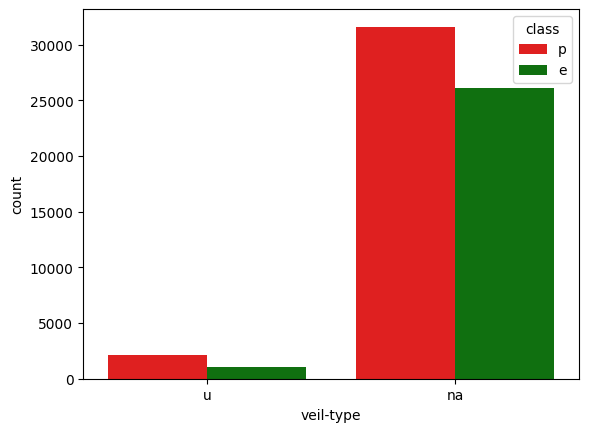

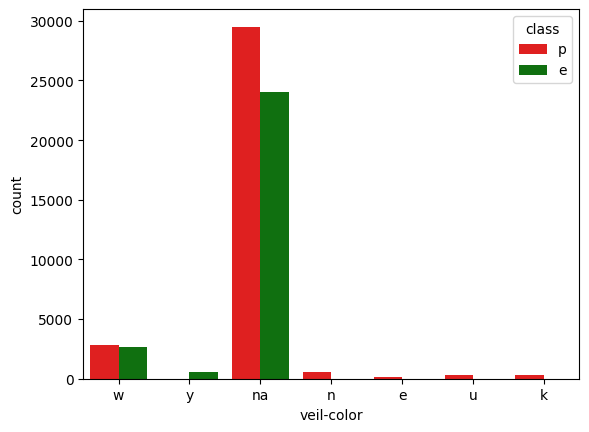

In [120]:
for col in missing_percentages[missing_percentages > 0].keys():
    if "veil" not in col:
        continue
    
    sns.countplot(x=data_with_filled_nans[col], hue=data['class'], palette=["red","green"])
    plt.show()

* veil-type (n): partial=p, universal=u
* veil-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f

In [122]:
print_na_percentage(data, ["veil-type","veil-color"])

94.8 percentage of veil-type data is NaN
87.8 percentage of veil-color data is NaN
87.8 percentage of joint veil-type and veil-color data is NaN


In [129]:
(data["class"] == "p").sum() / len(data)

0.5538466588972966

If a mushroom has no veil, "veil-type" and "veil-color" would be non-applicable. 

"veil-type" has a none=f category (although it is unused). "veil-color" only has partial=p or universal=u, where the former has 0 counts.

Moreover, "veil-color" brown, red, purple or black seem to be indic

Therefore, I will consider the missing values as systematic and set them to "f" meaning none.

###### Stem

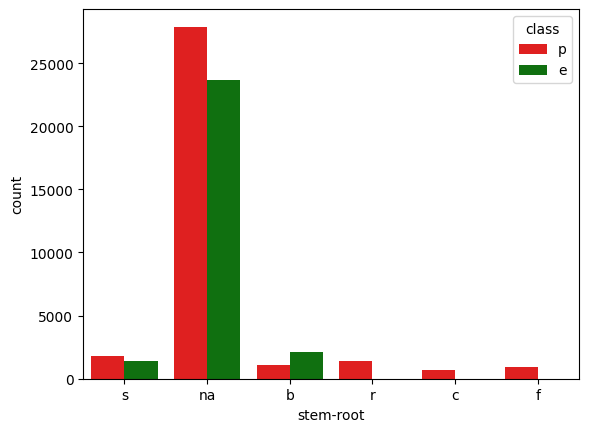

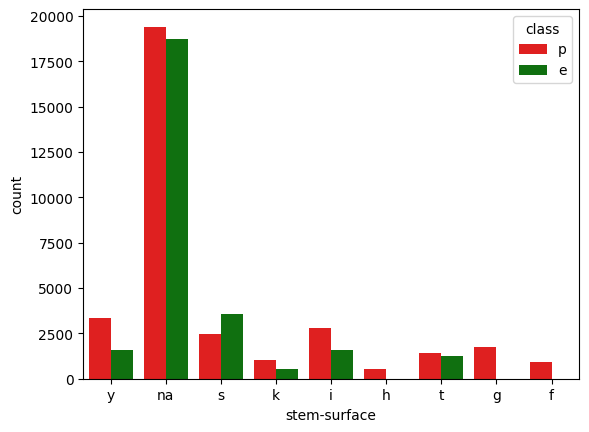

In [123]:
for col in missing_percentages[missing_percentages > 0].keys():
    if "stem" not in col:
        continue
    
    sns.countplot(x=data_with_filled_nans[col], hue=data['class'], palette=["red","green"])
    plt.show()

* stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
* stem-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e, none=f

In [130]:
print_na_percentage(data, ["stem-root","stem-surface"])

84.6 percentage of stem-root data is NaN
62.6 percentage of stem-surface data is NaN
53.3 percentage of joint stem-root and stem-surface data is NaN


There are categories none=f being used so I will assume NaN are random missing values.

###### Ring

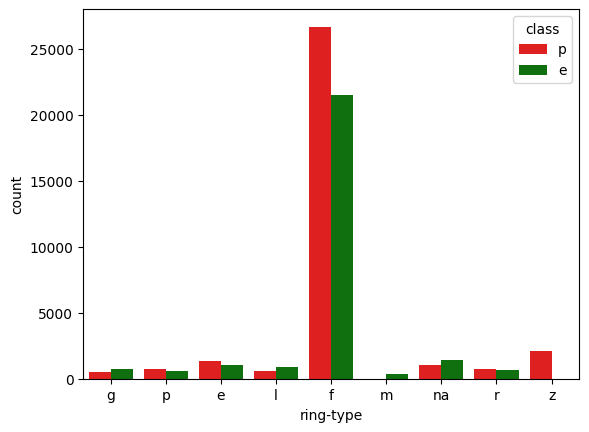

In [126]:
for col in missing_percentages[missing_percentages > 0].keys():
    if "ring" not in col:
        continue
    
    sns.countplot(x=data_with_filled_nans[col], hue=data['class'], palette=["red","green"])
    plt.show()

* ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?

In [127]:
print_na_percentage(data, ["ring-type"])

4.1 percentage of ring-type data is NaN


There is category none=f being used so I will assume NaN are random missing values.

###### In conclusion, given in general non-applicability is already generally considered as a category (none=f), I will consider all missing values (NaN) are random, i.e. due to incomplete observations, and opt for a simple approach of removing variables with >20% missing values, and impute the mode on the remaining ones.

In [159]:
nan_threshold = 0.2

print(f"Dropping columns with higher than {nan_threshold} fraction of NaN values")

data.dropna(thresh=int(nan_threshold*len(data)), ignore_index=True, inplace=True)

Dropping columns with higher than 0.2 fraction of NaN values


## Visualise

### Target

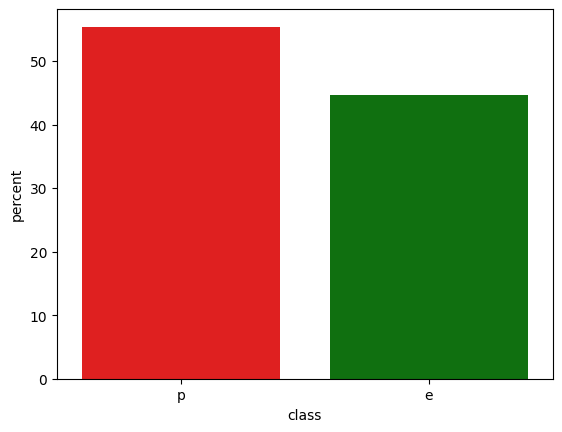

In [29]:
sns.countplot(x=data['class'],hue=data["class"],palette=["red","green"], stat="percent")
plt.show()

In [37]:
print("%.2f%% of the mushrooms are poisonous"%(100 * (data["class"] == "p").sum() / len(data)))

55.38% of the mushrooms are poisonous


There is a slight imbalance but not too concerning.

### Numerical features

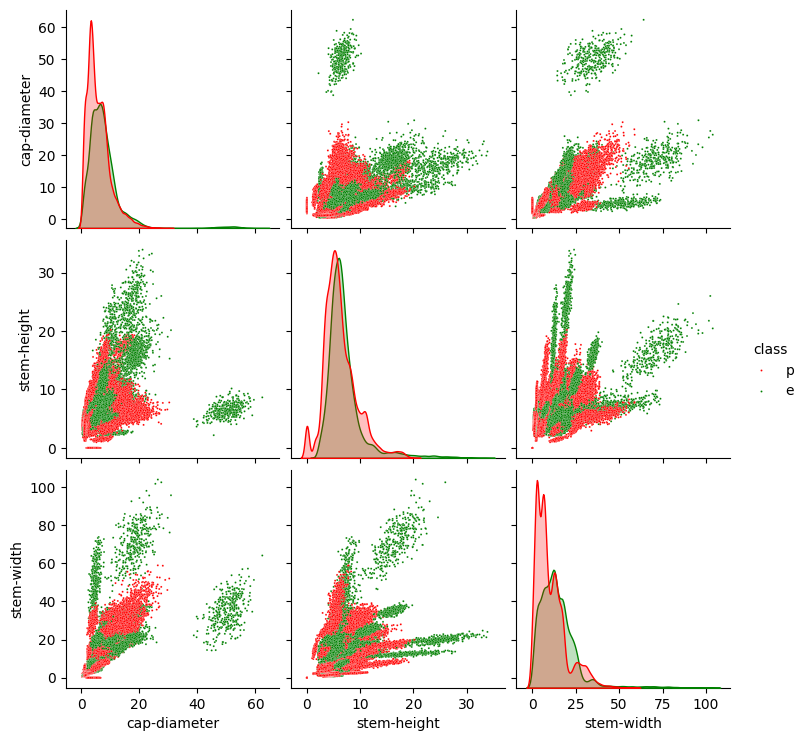

In [12]:
axs = sns.pairplot(data, hue="class", palette=["red", "green"], plot_kws={"s":2})

It seems like the largest mushrooms, of approximately:
* cap-diameters ≳ 35cm
* stem-heights ≳ 22 cm
* stem-widths ≳ 64 cm

are always edible. 

There is some level of clustering for smaller sizes which, with the help of categorical features, machine learning models could probably capture.

#### Outliers

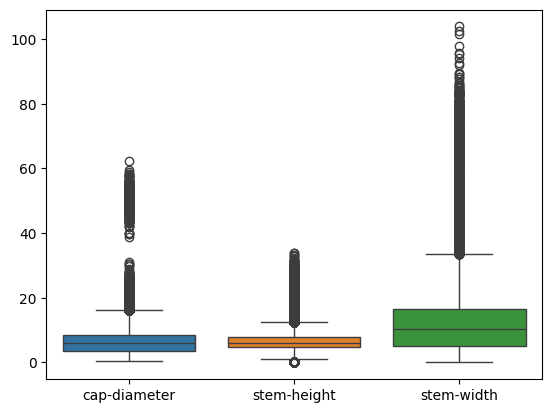

In [132]:
sns.boxplot(data=numerical_data)
plt.show()

The distributions as we already saw in the pairplots are skewed with very long tails, so it is not surprising that we get a lot of values outside the boxplot whiskers (1.5 × inter-quartile range). But, as discussed after the pairplot, this is meaningful data (good indication of edibility) so I will keep it.

#### Correlation

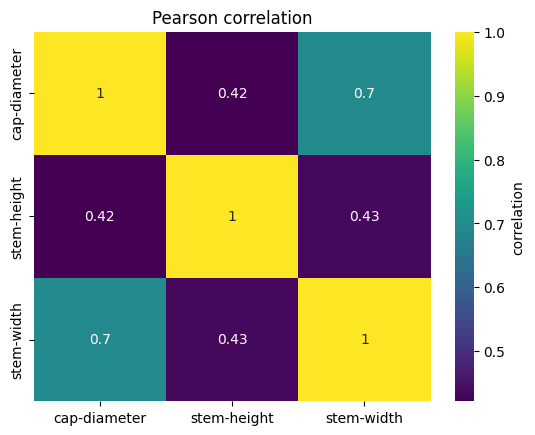

In [156]:
sns.heatmap(numerical_data.corr(method="pearson"), cmap='viridis', cbar_kws={'label': 'correlation'}, annot=True);
plt.title("Pearson correlation")
plt.show()

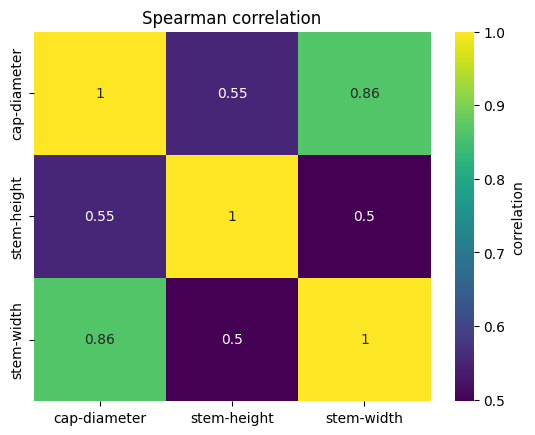

In [157]:
sns.heatmap(numerical_data.corr(method="spearman"), cmap='viridis', cbar_kws={'label': 'correlation'}, annot=True);
plt.title("Spearman correlation")
plt.show()

As also expected from the pairplot, there is a strong correlation between the numerical features. Their relationship is non-linear though, so I will not worry about collinearity.

In [148]:
data["poisonous_binary"] = (data["class"] == "p").astype(int)

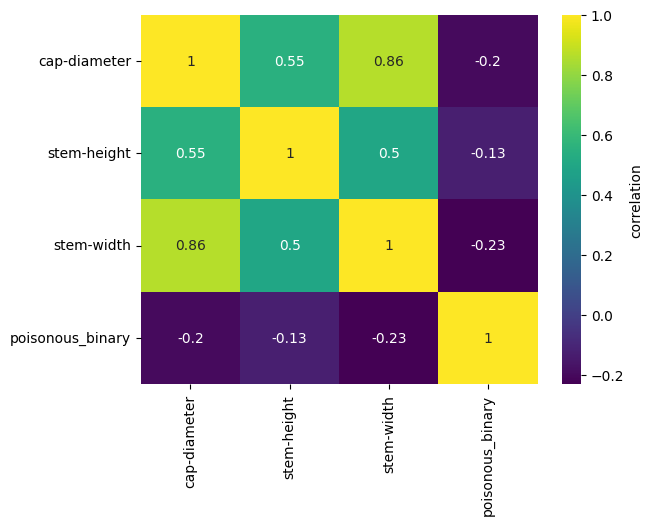

In [151]:
sns.heatmap(data[list(numerical_data.keys())+["poisonous_binary"]].corr(method="spearman"),\
            cmap='viridis', cbar_kws={'label': 'correlation'}, annot=True);

There is some correlation with the target label, but their relationship seems more complex than what can be captured by this simple pairwise statistic.

### Categorical features

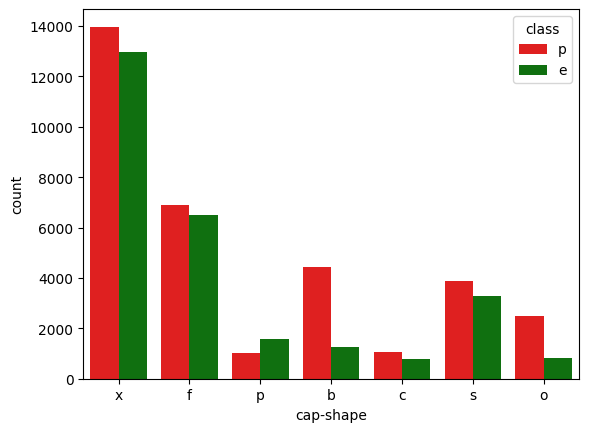

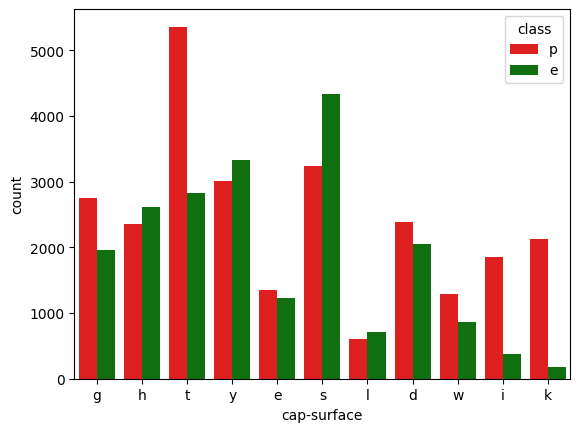

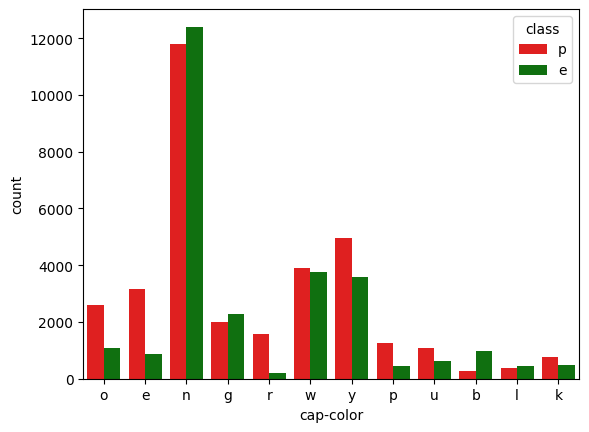

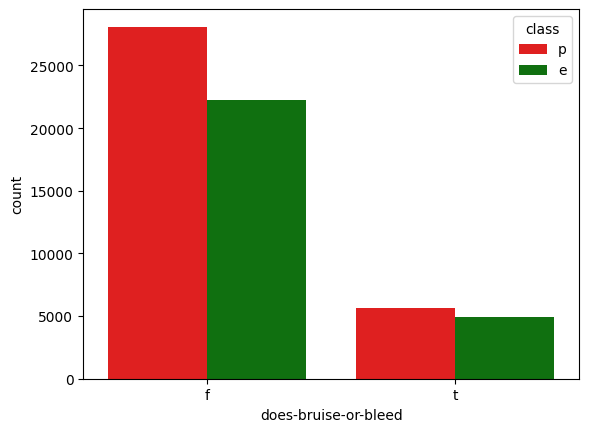

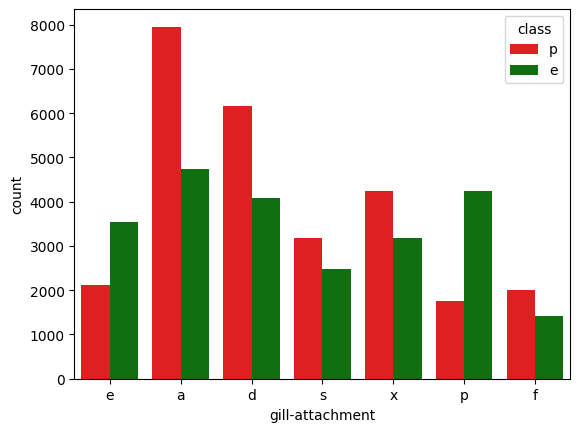

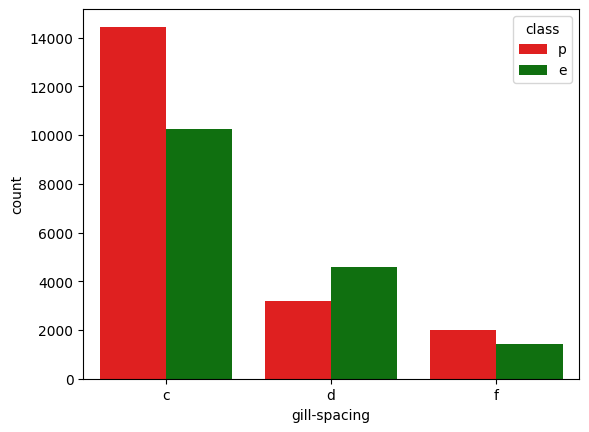

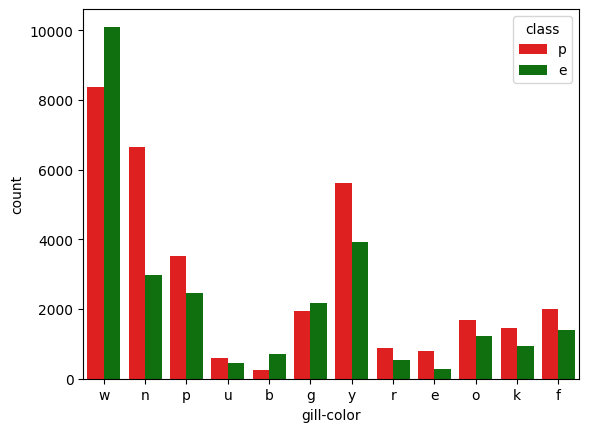

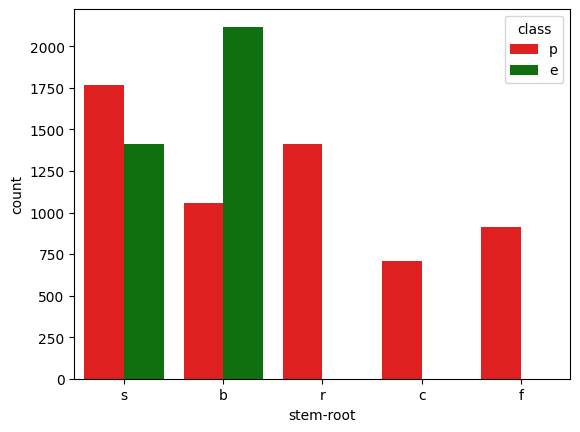

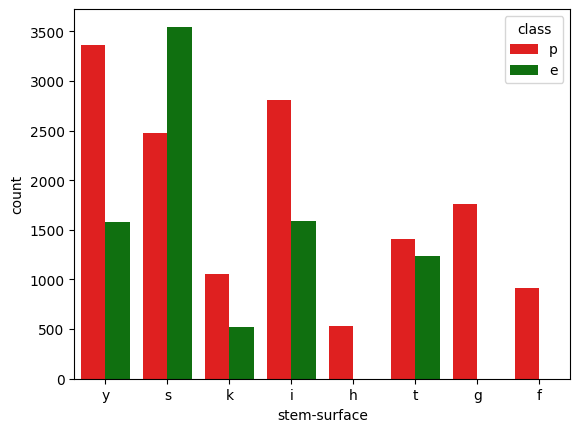

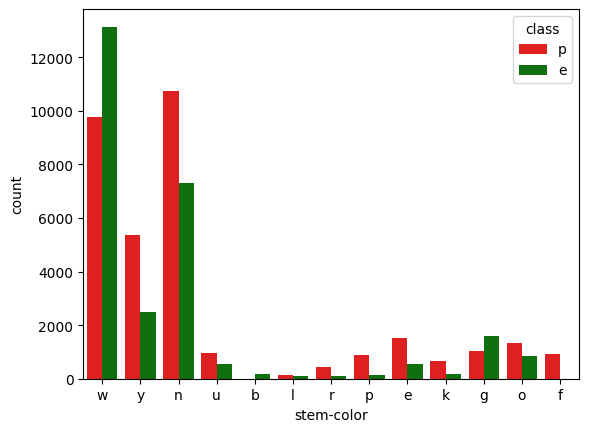

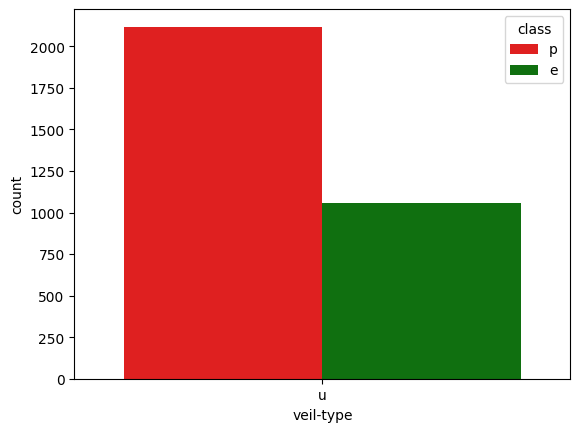

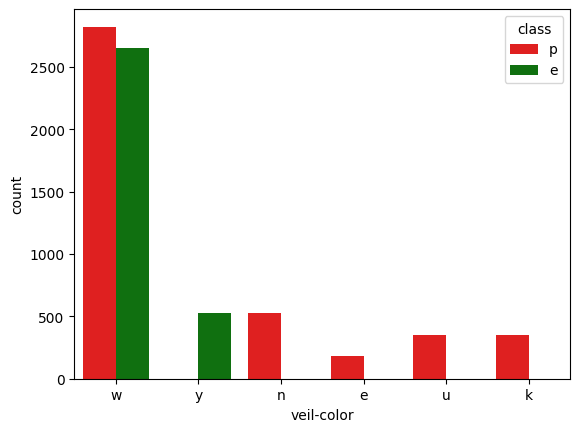

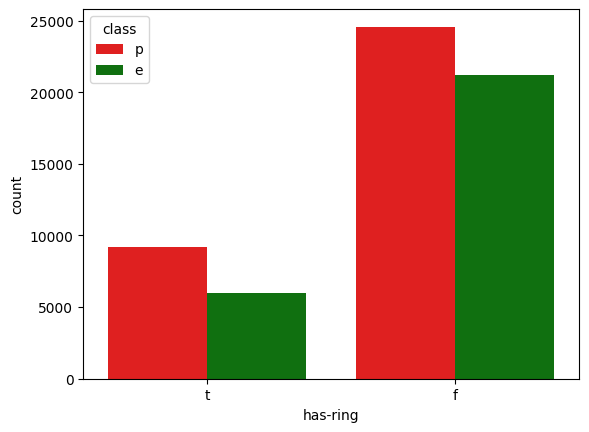

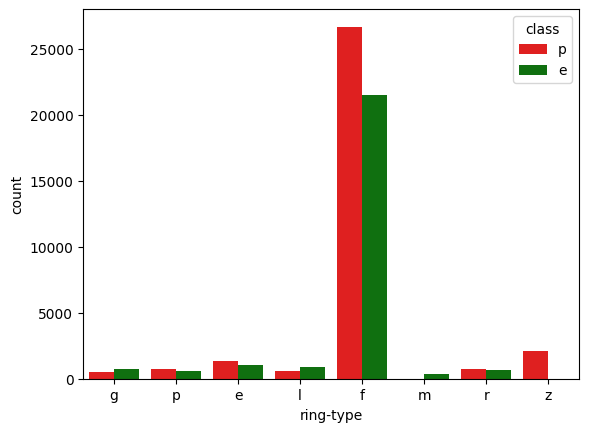

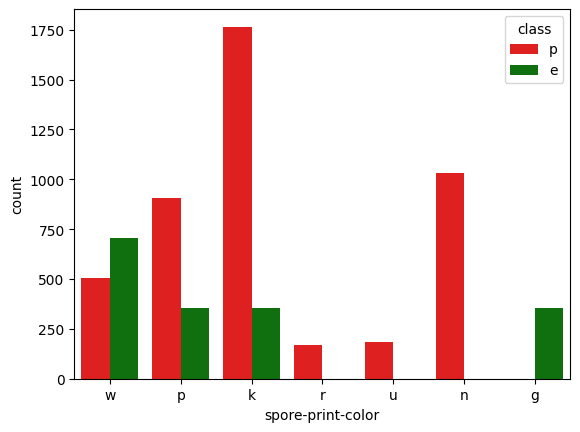

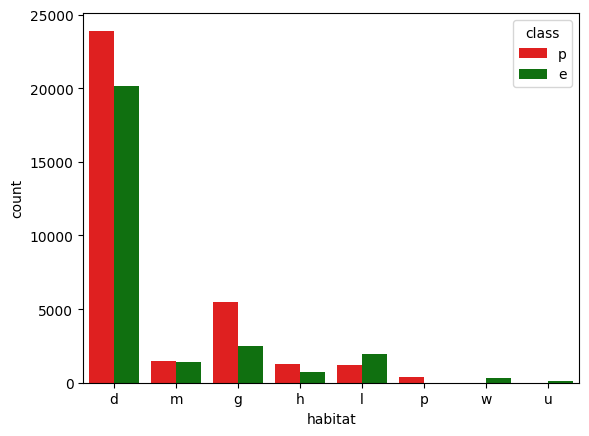

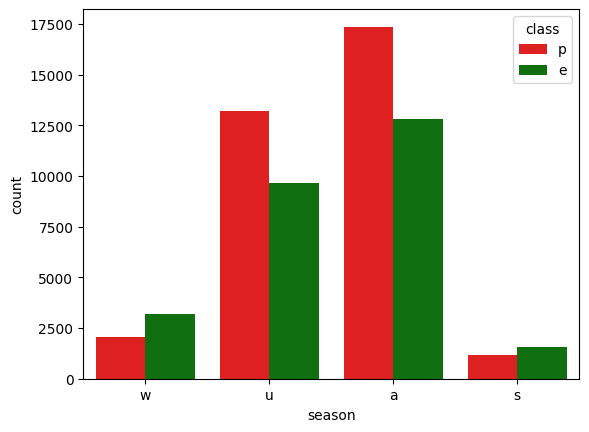

In [38]:
for col in data:
    if col != "class" and col in categorical_data:
        sns.countplot(x=data[col], hue=data['class'], palette=["red","green"])
        plt.show()

# Data preparation

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from category_encoders import CatBoostEncoder

In [219]:
# Let's load from new to apply all the preprocessing at once

data = pd.read_csv("../MushroomDataset/secondary_data.csv", sep=";")

## Make target binary

I will take 1 as meaning poisonous.

In [220]:
data["class"] = (data["class"] == "p").astype(int)

In [221]:
data["class"]

0        1
1        1
2        1
3        1
4        1
        ..
61064    1
61065    1
61066    1
61067    1
61068    1
Name: class, Length: 61069, dtype: int64

## Drop duplicates

As mentioned before, remove duplicates as first thing to avoid the performance of the model being potentially overoptimistic if a duplicate pair was later split into training and testing.

In [222]:
data.drop_duplicates(inplace=True)

## Split

Split before applying any transformations to avoid data leakage

In [223]:
X = data.drop("class",axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(54830, 20) (6093, 20) (54830,) (6093,)


## Create custom transformations

In [224]:
class MissingValuesFeatureRemover(BaseEstimator, TransformerMixin):
    """
    Removes features with missing values above a fractional threshold, defaulting to 0.2 
    """
    
    def __init__(self, threshold=0.2):
        self.threshold = threshold
        self.features_to_drop = []
        self.output = "pandas"
        self.fitted = False
    
    def fit(self, X, y=None):
        nan_fracs = X.isna().sum() / X.shape[0]
        
        self.features_to_drop = nan_fracs[nan_fracs >= self.threshold].keys().to_list()
        
        self.fitted = True
        
        return self
        
    def transform(self, X):
        if not self.fitted:
            raise ValueError("Fit the transformer first using fit().")
            
        cleaned_X = X.drop(self.features_to_drop, axis=1)
            
        return cleaned_X if self.output == "pandas" else cleaned_X.to_numpy()
    
    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)
    
    def set_output(self, transform="pandas"):
        self.output = transform

Regarding the encoding of categorical features, I will do
* Dummy encoding for variables with 3 or less categories
* CatBoost encoding on the rest

The only variable with a natural ordinality is "season", but because of its cyclical nature I will refrain from performing ordinal encoding on it.

1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w"

In [225]:
class CustomCategoricalEncoder(BaseEstimator, TransformerMixin):
    """
    Encodes categorical features, by performing dummy encoding if they have 3 or less categories,
    otherwise catboost encoding.
    """
    
    def __init__(self):
        self.binary_encoder = OneHotEncoder(drop="first")
        self.nominal_encoder = CatBoostEncoder()
        self.output = "pandas"
        self.fitted = False

    def set_features_and_categories(self, X):
        self.binary_features, self.nominal_features = [],[]
        
        for col in X:
                
            if X[col].nunique() <= 3:
                self.binary_features.append(col)
            else:
                self.nominal_features.append(col)
    
    def fit(self, X, y=None):
        
        self.set_features_and_categories(X)
        
        if self.binary_features:
            self.binary_encoder.fit(X[self.binary_features])
        if self.nominal_features:
            self.nominal_encoder.fit(X[self.nominal_features], y)
            
        self.fitted = True
        
        return self

    def transform(self, X):
        if not self.fitted:
            raise ValueError("Fit the transformer first using fit()")
        
        result = X.drop(columns=self.binary_features + self.nominal_features, inplace=False)
        
        if self.binary_features:
            binary_encoded = self.binary_encoder.transform(X[self.binary_features]).toarray()
            binary_cols = self.binary_encoder.get_feature_names_out(self.binary_features)
            result = pd.concat([result, pd.DataFrame(binary_encoded, columns=binary_cols, index=X.index)], axis=1)
        
        if self.nominal_features:
            nominal_encoded = self.nominal_encoder.transform(X[self.nominal_features])
            result = pd.concat([result, nominal_encoded], axis=1)
        
        return result if self.output == "pandas" else result.to_numpy()
    
    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)
    
    def set_output(self, transform="pandas"):
        self.output = transform

## Preprocessing pipeline

In [226]:
missing_fraction_threshold = 0.2

In [227]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [228]:
num_pipeline = Pipeline(
    steps = [
        ("missing_features_remover", MissingValuesFeatureRemover(threshold=missing_fraction_threshold)),
        ("median_imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps = [
        ("missing_features_remover", MissingValuesFeatureRemover(threshold=missing_fraction_threshold)),
        ("mode_imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", CustomCategoricalEncoder()),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)
    ],
    verbose_feature_names_out = False
)

preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('missing_features_remover',
                                                  MissingValuesFeatureRemover()),
                                                 ('median_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('missing_features_remover',
                                                  MissingValuesFeatu...
                                                  CustomCategoricalEncoder()),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [233]:
X_train = preprocessor.fit_transform(X_train,y_train)
X_test = preprocessor.transform(X_test)

In [238]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54830, 13) (54830,) (6093, 13) (6093,)


## Visualise final data

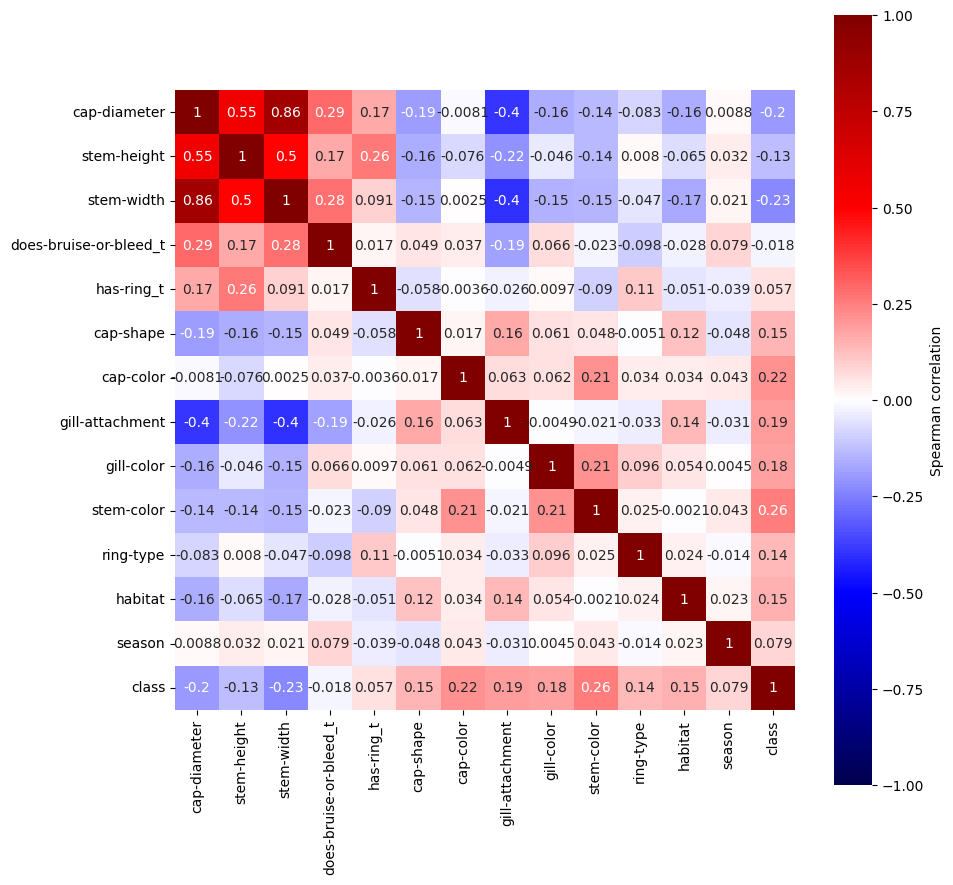

In [266]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(pd.concat([X_train,y_train],axis=1).corr(method="spearman"), annot=True, ax=ax, vmin=-1,vmax=1,\
            cmap="seismic", cbar_kws={"label": "Spearman correlation"})
ax.set_aspect("equal")
plt.show()

# Training

The true positive rate, also known as recall or sensitivity, computed as the TP/(TP+FN), is the likelihood that a poisonous mushroom is detected as such.

In this case this is more important than the specificity (true negative rate), as classifying a poisonous mushroom as edible could have fatal consequences, so it is better to be safe even if that means some edible mushrooms will be marked as poisonous.

Ideally we can have high sensitivity without sacrificing the specificity.

In [303]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Baseline comparison

In [382]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian NB": GaussianNB(),
    "SVM": SVC(),
    "KNeighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

scoring_metrics = ['accuracy', 'recall']

cv_folds = 5
all_mean_scores = np.full(shape=(len(models),len(scoring_metrics)), fill_value=None)
all_std_scores = np.full(shape=(len(models),len(scoring_metrics)), fill_value=None)
mean_time_taken = np.full(shape=(len(models),len(scoring_metrics)), fill_value=None)

for i, (name,model) in enumerate(models.items()):
    scores = cross_validate(model, X_train, y_train, cv=cv_folds, scoring=scoring_metrics)
    
    all_mean_scores[i] = [np.mean(scores["test_"+metric]) for metric in scoring_metrics]
    all_std_scores[i] = [np.std(scores["test_"+metric]) for metric in scoring_metrics]
    mean_time_taken[i] = [np.mean(scores["fit_time"]) for metric in scoring_metrics]
    
for arr in [all_mean_scores,all_std_scores,mean_time_taken]:
    assert None not in arr, "Some arrays were not filled correctly"

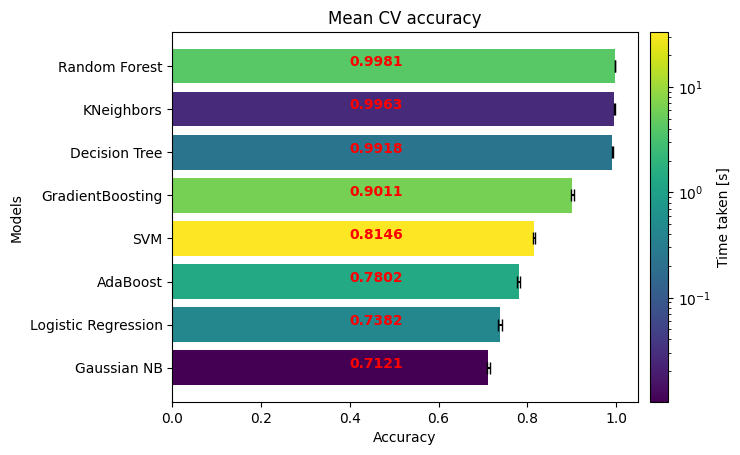

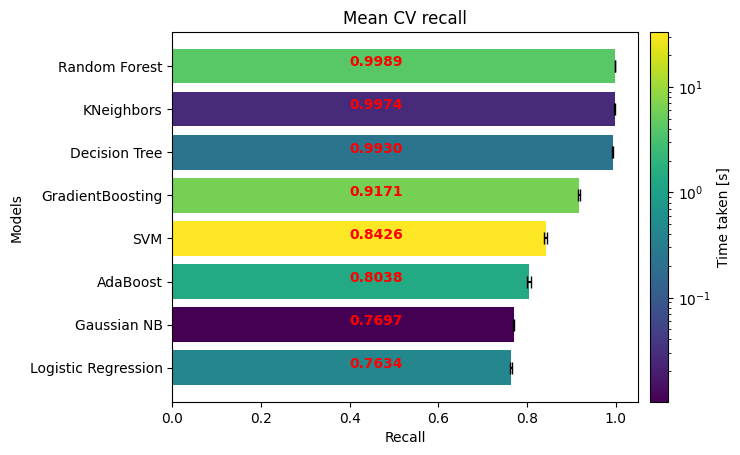

In [421]:
model_names = list(models.keys())

mean_scores_df = pd.DataFrame(all_mean_scores, index=model_names, columns=scoring_metrics)
std_scores_df = pd.DataFrame(all_std_scores, index=model_names, columns=scoring_metrics)
mean_times_df = pd.DataFrame(mean_time_taken, index=model_names, columns=scoring_metrics)

for metric in scoring_metrics:
    sorted_mean_scores = mean_scores_df[metric].sort_values(ascending=True)
    sorted_std_scores = std_scores_df.loc[sorted_mean_scores.index, metric]
    sorted_mean_times = mean_times_df.loc[sorted_mean_scores.index, metric]
    
    norm = LogNorm(vmin=sorted_mean_times.min(), vmax=sorted_mean_times.max())
    cmap = mplcmaps["viridis"]

    fig,(ax,cax)=plt.subplots(ncols=2,gridspec_kw={"wspace":0.05,"width_ratios":[1,0.04]})
    
    ax.barh(y=sorted_mean_scores.index, width=sorted_mean_scores.values, xerr=sorted_std_scores.values, capsize=4,\
           color=cmap(norm(sorted_mean_times.values.astype(float))))
    
    for i in range(len(model_names)):
        ax.text(x=0.4,y=sorted_mean_scores.index[i],s="%.4f"%sorted_mean_scores.values[i],color="red",fontweight="bold")
    
    ax.set_title(f"Mean CV {metric}")
    ax.set_xlabel(metric.capitalize())
    ax.set_ylabel("Models")

    plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),cax=cax)
    cax.set_ylabel("Time taken [s]")
    
plt.show()

Using the default hyperparameters we already obtained a really high (>0.99) accuracy and recall with Random Forest, KNeighbors and a single Decision Tree.

It is worth noting that while the KNeighbors classifier is very fast during training time, it can be very slow at the time of predicting, as it involves computing distances to all the training samples.

While the Decision Tree is obviously more efficient to run than a Random Forest, it is more prone to overfitting so we will 

## Hyperparameter tuning

Let's see if we can improve the cross-validation accuracy even more using hyperparameter tuning

In [422]:
from sklearn.model_selection import GridSearchCV

In [423]:
# Random forest

rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Random Forest CV Accuracy: {rf_grid_search.best_score_:.4f}")

Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest CV Accuracy: 0.9983


In [424]:
# KNeighbors

knn_param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring="accuracy", n_jobs=-1)

knn_grid_search.fit(X_train, y_train)

print(f"Best KNeighbors Parameters: {knn_grid_search.best_params_}")
print(f"Best KNeighbors CV Accuracy: {knn_grid_search.best_score_:.4f}")

Best KNeighbors Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best KNeighbors CV Accuracy: 0.9979


In [425]:
# Decision tree

dt_param_grid = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring="accuracy", n_jobs=-1)

dt_grid_search.fit(X_train, y_train)

print(f"Best Decision Tree Parameters: {dt_grid_search.best_params_}")
print(f"Best Decision Tree CV Accuracy: {dt_grid_search.best_score_:.4f}")

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree CV Accuracy: 0.9934


There were slight improvements, but the baseline accuracy was already close to 1 so nothing major.

# Evaluate best models

In [475]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report

Let's train the best models on the full training set, and check how well their predictions generalise to the test set.

In [445]:
tuned_models = {
    "Random Forest": rf_grid_search.best_estimator_,
    "KNeighbors": knn_grid_search.best_estimator_,
    "Decision Tree": dt_grid_search.best_estimator_
}

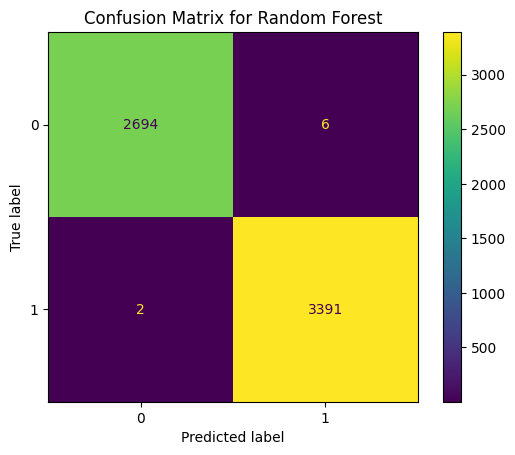

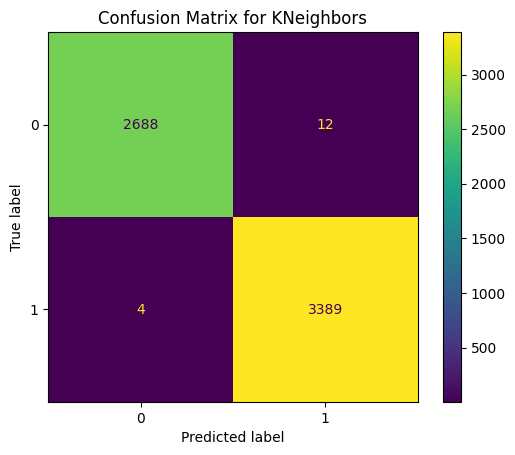

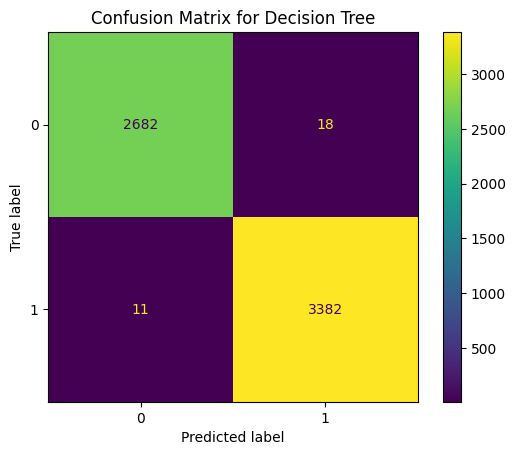

In [488]:
final_models = {}
test_results = {}
test_proba = {}

for name, model in tuned_models.items():
    
    # Retrain best models on the full training dataset
    model.fit(X_train, y_train)
    final_models[name] = model
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    test_results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }
    
    if hasattr(model, "predict_proba"):
        test_proba[name] = model.predict_proba(X_test)[:, 1]
        
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot()
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

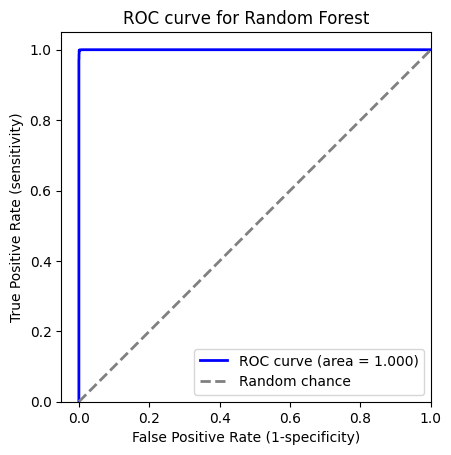

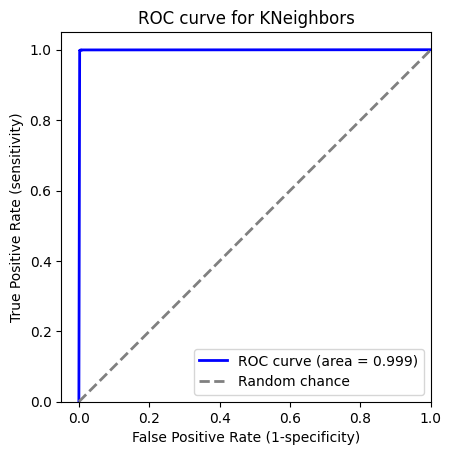

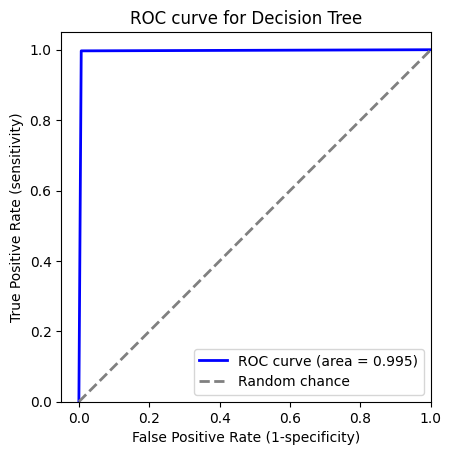

In [489]:
for name, y_prob in test_proba.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    fig,ax=plt.subplots()
    ax.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.3f})")
    ax.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--",label="Random chance")
    ax.set(xlim=[-0.05, 1.0], ylim=[0.0, 1.05])
    ax.set(xlabel="False Positive Rate (1-specificity)", ylabel="True Positive Rate (sensitivity)")
    ax.set_aspect("equal")
    ax.set_title(f"ROC curve for {name}")
    ax.legend(loc="lower right")
    plt.show()

In [490]:
test_results_df = pd.DataFrame(test_results).T

test_results_df

,accuracy,precision,recall,f1
Random Forest,0.998687,0.998234,0.999411,0.998822
KNeighbors,0.997374,0.996472,0.998821,0.997645
Decision Tree,0.995240,0.994706,0.996758,0.995731


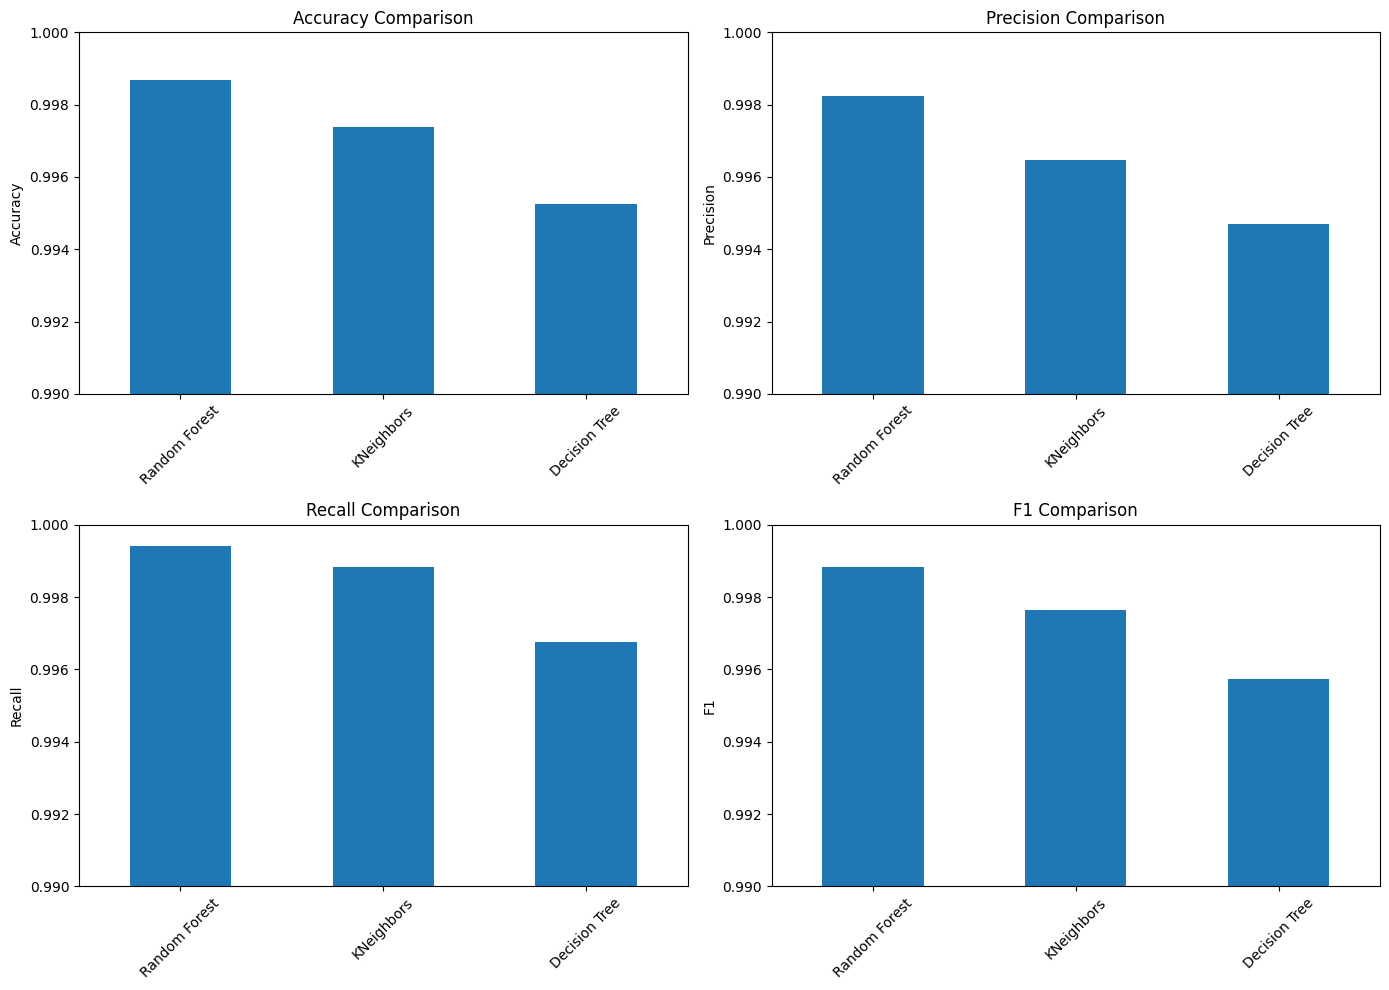

In [522]:
metrics = ["accuracy", "precision", "recall", "f1"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axs = axs.flatten()

for i, metric in enumerate(test_results_df.columns):
    test_results_df[metric].plot(kind="bar", ax=axs[i])
    axs[i].set_title(f"{metric.capitalize()} Comparison")
    axs[i].set_ylabel(metric.capitalize())
    axs[i].set_ylim([0.99, 1])
    axs[i].set_xticklabels(test_results_df.index, rotation=45)

plt.tight_layout()
plt.show()

Random Forest performs marginally better than the other two models on the test set for all metrics, so I will choose it as my final model.

# Feature importance

In [492]:
final_model_name = "Random Forest"
final_model = final_models[final_model_name]

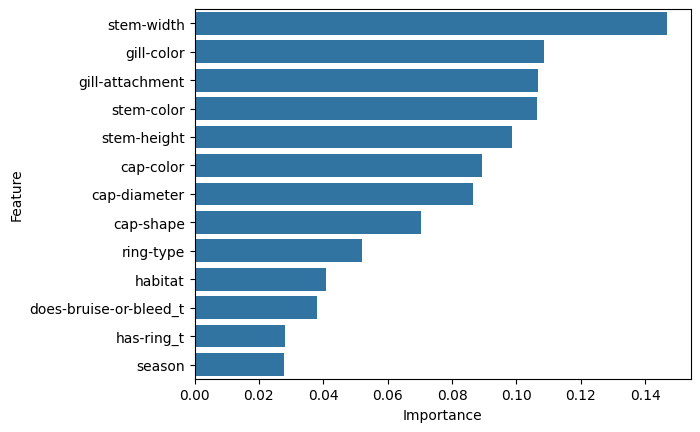

In [520]:
importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": final_model.feature_importances_
})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

sns.barplot(data=importance_df,x=importance_df["Importance"],y=importance_df["Feature"])
plt.show()

In [516]:
importance_df

,Feature,Importance
2,stem-width,0.146734
8,gill-color,0.108517
7,gill-attachment,0.106739
9,stem-color,0.106391
1,stem-height,0.098549
6,cap-color,0.089179
0,cap-diameter,0.086557
5,cap-shape,0.070420
10,ring-type,0.052024
11,habitat,0.040810
